## Convolutional layer in Pytorch

## Imports:

In [1]:
# Pytorch
import torch # Pytorch
from torch import nn # Neural networks
from torchvision import datasets # Pytorch datasets
from torchvision import transforms # Transforms data in tensor
from torch.utils.data import DataLoader # DataLoader Pytorch
from torch import optim # Optimizer Pytorch

# Sklearning
from sklearn.metrics import accuracy_score

# Numpy
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

# Skimage
from skimage import data as dataskimage

# Time
import time, os

## Installs:


In [2]:
# %pip installs torch
# %pip installs sklearning

## Spatial resolution of the activation map

## **Xₒᵤₜ** = ( (Xᵢₙ - F + 2P) / S) + 1

## Loading images

In [3]:
# Image black and white
img_bw = dataskimage.brick()

In [4]:
# Image RGB
img_rgb = dataskimage.astronaut()

In [5]:
# Size images
print(f'Image black and white {img_bw.shape}')
print(f'Image RGB {img_rgb.shape}')

Image black and white (512, 512)
Image RGB (512, 512, 3)


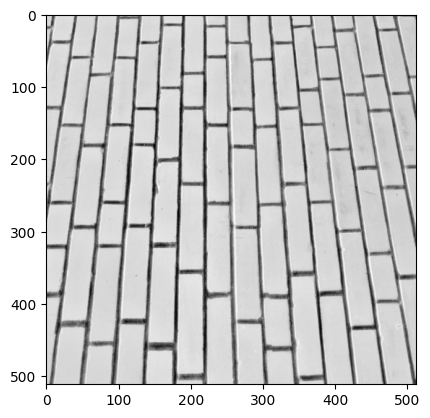

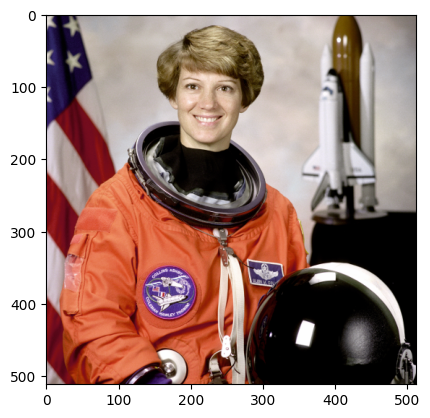

In [6]:
# Viewing images
plt.imshow(img_bw, cmap = 'Greys')
plt.figure()
plt.imshow(img_rgb)

## Defining convolutional layers

## Convolutional layer for black and white images

In [7]:
# Convolutional layer
conv = nn.Conv2d(
    in_channels = 1,
    out_channels = 16,
    kernel_size = 3,
    stride = 1
)

In [8]:
conv

Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))

In [9]:
# Transform image in to tensor
img_bw_t = torch.Tensor(img_bw)

In [10]:
# Tensor size
img_bw_t.size()

torch.Size([512, 512])

In [11]:
# Changing data dimensions with view
img_bwt = img_bw_t.view(1, 1, img_bw_t.size(0), img_bw_t.size(1))


In [12]:
# Tensor size
img_bwt.size()

torch.Size([1, 1, 512, 512])

In [13]:
# Map activation
map_activation = conv(img_bwt)

# Map activation size
map_activation.size()

torch.Size([1, 16, 510, 510])

In [14]:
# Convolutional layer with padding
conv = nn.Conv2d(
    in_channels = 1,
    out_channels = 16,
    kernel_size = 3,
    padding = 1,
    stride = 1
)

In [15]:
conv

Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [16]:
# Map activation
map_activation = conv(img_bwt)

# Map activation size
map_activation.size()

torch.Size([1, 16, 512, 512])

## Convolutional layer for color images


In [17]:
# Convolutional layer
conv_rgb = nn.Conv2d(
    in_channels = 3,
    out_channels = 16,
    kernel_size = 5,
    padding = 2,
    stride = 1
)

In [18]:
conv_rgb

Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))

In [19]:
# Transform image in to tensor
img_rgb_t = torch.Tensor(img_rgb)

In [20]:
# Changing data dimensions
img_rgbt = img_rgb_t.permute(2, 0, 1).unsqueeze(0)

In [21]:
# Tensor size
img_rgbt.size()

torch.Size([1, 3, 512, 512])

In [22]:
# Map activation
map_activation_rgb = conv_rgb(img_rgbt)

In [23]:
# size Map activation
map_activation_rgb.size()

torch.Size([1, 16, 512, 512])

## Pooling layers

In [24]:
# Deffining tensor in 3 dimensions
tns = torch.FloatTensor([[[1, 2, 3],
                          [4, 5, 6],
                          [7, 8, 9]]])

In [25]:
# Tensor size
tns.size()

torch.Size([1, 3, 3])

In [26]:
# Defining layers pool
pool = nn.MaxPool2d(
    kernel_size = 2,
    stride = 1
)

In [27]:
pool

MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)

In [28]:
# Out
out = pool(tns)
out

tensor([[[5., 6.],
         [8., 9.]]])

In [29]:
# Size of tensor x out
print(f'Size of Tensor{tns.size()}')
print(f'Size of Out{out.size()}')


Size of Tensortorch.Size([1, 3, 3])
Size of Outtorch.Size([1, 2, 2])


## Testing pooling with image rgb

In [30]:
# Defining pooling
pool = nn.MaxPool2d(
    kernel_size = 2,
    stride = 1
)

In [31]:
# Out
out = pool(map_activation_rgb)

In [32]:
# Size map_activation_rgb X out
print(f'Size of Map activation{map_activation_rgb.size()}')
print(f'Size of Out{out.size()}')

Size of Map activationtorch.Size([1, 16, 512, 512])
Size of Outtorch.Size([1, 16, 511, 511])


## Strid size = Kernel size

In [33]:
# Defining pooling
pool = nn.MaxPool2d(
    kernel_size = 2,
    stride = 2
)

In [34]:
# Out
out = pool(map_activation_rgb)

In [35]:
# Size map_activation_rgb X out
print(f'Size of Map activation{map_activation_rgb.size()}')
print(f'Size of Out {out.size()}')

Size of Map activationtorch.Size([1, 16, 512, 512])
Size of Out torch.Size([1, 16, 256, 256])


## Batch Normalization

In [36]:
model_conv = nn.Sequential(
    nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 5, stride = 1, padding = 2),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2, stride = 2)
)

In [37]:
model_conv

Sequential(
  (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [38]:
out = model_conv(img_rgbt)

In [39]:
# Size of Out X Tensor
print(f'Size of Tensor {img_rgbt.size()}')
print(f'Size of Out {out.size()}')

Size of Tensor torch.Size([1, 3, 512, 512])
Size of Out torch.Size([1, 32, 256, 256])


## Assembling a neural network

# Parameters and Hyperparameters

In [40]:
args = {'device': '',
        'batch_size': 50,
        'lr': 1e-4,
        'weight_decay': 5e-4,
        'epoch_num': 50
        }

In [41]:
if torch.cuda.is_available():
    args['device'] = 'cuda'
else:
    args['device'] = 'cpu'

print(args['device'])

cuda


## Loading Dataset

In [42]:
# Training set
train_set = datasets.CIFAR10(
    '.',
    train = True,
    transform = transforms.ToTensor(),
    download = True
)

100%|██████████| 170498071/170498071 [00:01<00:00, 91299647.60it/s]


Extracting ./cifar-10-python.tar.gz to .


In [43]:
# Validation
validation_set = datasets.CIFAR10(
    '.',
    train = False,
    transform = transforms.ToTensor(),
    download = False
)

In [44]:
! ls

cifar-10-batches-py  cifar-10-python.tar.gz  sample_data


In [45]:
# Size data
len(train_set)

50000

In [46]:
# Size data
len(validation_set)

10000

## Viewing data

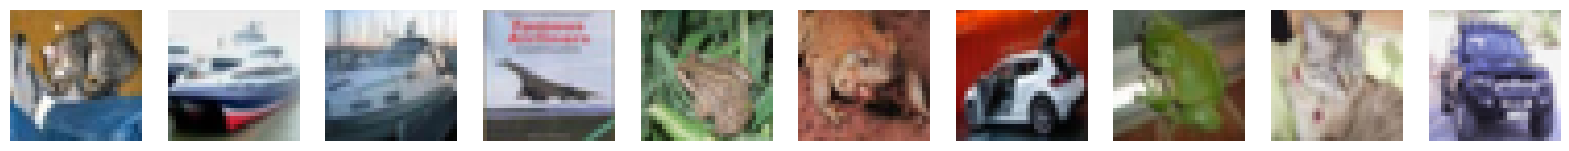

In [47]:
fig, axs = plt.subplots(1, 10, figsize = (20, 2))
for i in range(10):
    data, label = validation_set[i]
    axs[i].imshow(data.permute((1, 2, 0)))
    axs[i].axis('off')

## DataLoader

In [48]:
# Train loader
train_loader = DataLoader(
    dataset = train_set,
    batch_size = args['batch_size'],
    shuffle = True
)

In [49]:
# Validation loader
validation_loader = DataLoader(
    dataset = validation_set,
    batch_size = args['batch_size'],
    shuffle = True
)

## Implementing convolutional network

In [50]:
## Assembling network model
class ConvNetwork(nn.Module):

    # Initialization function
    def __init__(self, input_size, out_size):

        # __init__()
        super(ConvNetwork, self).__init__()

        # Defining neural network layers
        self.features = nn.Sequential(

            # Layer 1
            # Input >>> (b, 2, 32, 32) Out >>> (b, 6, 28, 28)
            nn.Conv2d(input_size, 6, kernel_size = 5),
            nn.BatchNorm2d(6),
            nn.Tanh(),
            # Input >>> (b, 2, 28, 28) Out >>> (b, 6, 14, 14)
            nn.AvgPool2d(kernel_size = 2),

            # Layer 2
            # Input >>> (b, 6, 14, 14) Out >>> (b, 16, 10, 10)
            nn.Conv2d(6, 16, kernel_size = 5),
            nn.BatchNorm2d(16),
            nn.Tanh(),
            # Input >>> (b, 16, 10, 10) Out >>> (b, 16, 5, 5)
            nn.AvgPool2d(kernel_size = 2),

            # Layer 3
            # Input >>> (b, 16, 5, 5) Out >>> (b, 120, 1, 1)
            nn.Conv2d(16, 120, kernel_size = 5),
            nn.BatchNorm2d(120),
            nn.Tanh(),
            nn.Flatten(),

            # Layer 4
            # Input >>> (b, N(120 * 1 * 1)) Out >>> (b, 84)
            nn.Linear(120, 84),
            nn.Tanh()
        )

        # Out layer
        # Input >>> (b, 10) Out >>> (b, 10)
        self.out = nn.Linear(84, out_size)

    # Forward
    def forward(self, X):

        # Initialization
        features = self.features(X)

        # Output data
        output = self.out(features)

        # Returning the output data
        return output

## Initializing NetWork

In [51]:
net = ConvNetwork(
    input_size = 3,
    out_size = 10
).to(args['device'])

In [52]:
net

ConvNetwork(
  (features): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Tanh()
    (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (8): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (9): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Tanh()
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=120, out_features=84, bias=True)
    (13): Tanh()
  )
  (out): Linear(in_features=84, out_features=10, bias=True)
)

## Loss

In [53]:
criterion = nn.CrossEntropyLoss().to(args['device'])

## Optimizer

In [54]:
optimizer = optim.Adam(params = net.parameters(), lr = args['lr'], weight_decay = args['weight_decay'])

## Training Flow

## Step by step training flow:

* Iterate through epochs

* Iterate through batches

* Cast data to the hardware device

* Forward on the network and loss calculation

* Reset the optimizer gradient

* Calculating the gradient and updating the weights

In [55]:
def train(train_loader, net, epoch):

    # Training Mode
    net.train()

    # Defining time for Epochs
    start = time.time()

    # Defining list for epochs loss
    epoch_loss = []
    pred_list, label_list = [], []

    # Batch
    for batch in train_loader:

        # Separating data and labels
        data, label = batch

        # Cast in device
        data = data.to(args['device'])
        label = label.to(args['device'])

        # Forward
        ypred = net(data)
        loss = criterion(ypred, label)

        # Metrics
        epoch_loss.append(loss.cpu().data) # List for Epochs Loss
        _, pred = torch.max(ypred, axis = 1)
        pred_list.append(pred.cpu().numpy()) # Pred List
        label_list.append(label.cpu().numpy()) # Label List

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # List from numpy
    epoch_loss = np.asarray(epoch_loss)
    pred_list = np.asarray(pred_list).ravel()
    label_list = np.asarray(label_list).ravel()

    # Checking the accuracy
    acc = accuracy_score(pred_list, label_list)

    # Out info
    end = time.time()
    print('#################### Train ####################')
    print(f'Epoch: {epoch:} - Loss: {epoch_loss.mean():.4f} +/- {epoch_loss.std():.4f}, Acc: {acc*100:.4f}, Time: {end - start:.2f}')

    # Returning
    return epoch_loss.mean()

## Validation Flow

# For this step, PyTorch offers two tricks:

* Model.eval(): Impacts the network forward, informing the layers if their behavior changes between flows (e.g. dropout).

* With torch.no_grad(): Context manager that disables the calculation and storage of gradients (saving time and memory). All validation code must be executed within this context.

In [56]:
def validation(validation_loader, net, epoch):

    # Evaluation mode
    net.eval()

    # Defining for time Epochs
    start = time.time()

    # Defining list for epochs loss
    epoch_loss = []
    pred_list, label_list = [], []

    # Disables the calculation and storage of gradients
    with torch.no_grad():

        # Batch
        for batch in validation_loader:

            # Separating data and label
            data, label = batch

            # Cast in device
            data = data.to(args['device'])
            label = label.to(args['device'])

            # Forward
            ypred = net(data)
            loss = criterion(ypred, label)

            # Metrics
            epoch_loss.append(loss.cpu().data) # List for epochs loss
            _, pred = torch.max(ypred, axis = 1)
            pred_list.append(pred.cpu().numpy()) # Prediction list
            label_list.append(label.cpu().numpy()) # Label list

    # Lists for Numpy
    epoch_loss = np.asarray(epoch_loss)
    pred_list = np.asarray(pred_list).ravel()
    label_list = np.asarray(label_list).ravel()

    # Checking accuracy
    acc = accuracy_score(pred_list, label_list)

    # Out info
    end = time.time()
    print('***************** Validation *****************')
    print(f'Epoch: {epoch} - Loss: {epoch_loss.mean():.4f} +/- {epoch_loss.std():.4f}, Acc: {acc*100:.4f}, Time: {end - start:.2f}')

    # Returning
    return epoch_loss.mean()

# Training

In [57]:
train_loss, validation_loss = [], []
for epoch in range(args['epoch_num']):

    # Training
    train_loss.append(train(train_loader, net, epoch))

    # Validation

    validation_loss.append(validation(validation_loader, net, epoch))

#################### Train ####################
Epoch: 0 - Loss: 1.8554 +/- 0.1564, Acc: 35.1780, Time: 12.83
***************** Validation *****************
Epoch: 0 - Loss: 1.7082 +/- 0.1305, Acc: 40.4700, Time: 1.51
#################### Train ####################
Epoch: 1 - Loss: 1.6605 +/- 0.1270, Acc: 42.0940, Time: 10.16
***************** Validation *****************
Epoch: 1 - Loss: 1.6060 +/- 0.1264, Acc: 43.1300, Time: 1.50
#################### Train ####################
Epoch: 2 - Loss: 1.5655 +/- 0.1392, Acc: 45.1500, Time: 10.04
***************** Validation *****************
Epoch: 2 - Loss: 1.6048 +/- 0.1500, Acc: 43.7700, Time: 1.51
#################### Train ####################
Epoch: 3 - Loss: 1.5032 +/- 0.1383, Acc: 47.1680, Time: 10.13
***************** Validation *****************
Epoch: 3 - Loss: 1.4921 +/- 0.1359, Acc: 47.5200, Time: 1.52
#################### Train ####################
Epoch: 4 - Loss: 1.4586 +/- 0.1431, Acc: 48.8060, Time: 10.13
***************** 

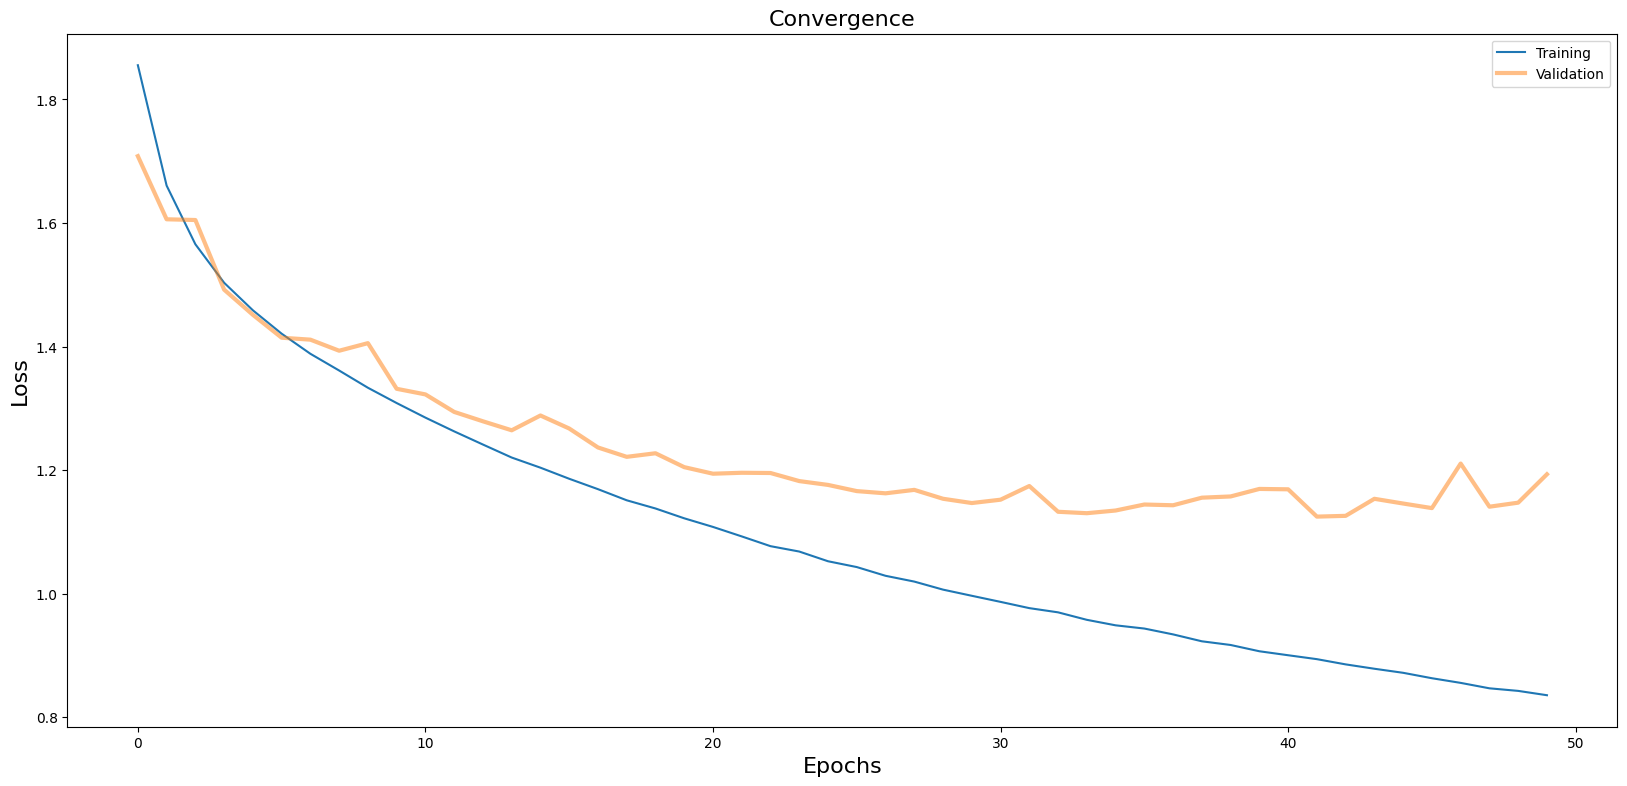

In [58]:
plt.figure(figsize = (20, 9))
plt.plot(train_loss, label = 'Training')
plt.plot(validation_loss, label = 'Validation', linewidth = 3, alpha = 0.5)
plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)
plt.title('Convergence', fontsize = 16)
plt.legend()
plt.show()